<a href="https://colab.research.google.com/github/ravij25/RAVIJ/blob/master/Linear_Regression_on_House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [10]:
df=pd.read_csv("https://raw.githubusercontent.com/ravij25/RAVIJ/master/house-prices.csv")

In [11]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [12]:
# Separate the feature (house_size) and target variable (house_price)
# Drop specific columns from the DataFrame
columns_to_drop = ['Brick', 'Neighborhood','Brick', 'Offers']
df_dropped = df.drop(columns=columns_to_drop)


In [13]:
df_dropped.head()

,Home,Price,SqFt,Bedrooms,Bathrooms
0,1,114300,1790,2,2
1,2,114200,2030,4,2
2,3,114800,1740,3,2
3,4,94700,1980,3,2
4,5,119800,2130,3,3


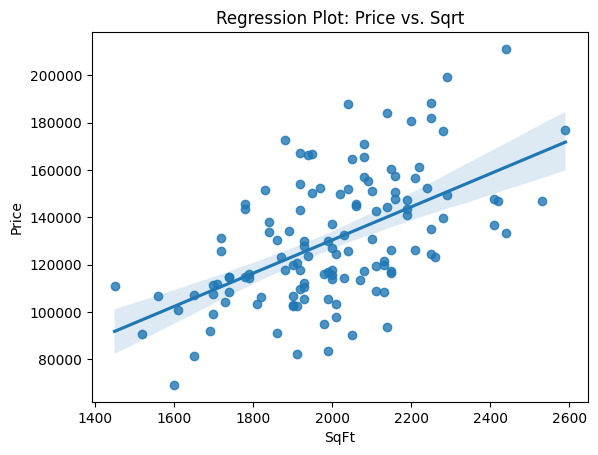

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'price' and 'Sqrt' are the column names in your DataFrame 'df'
sns.regplot(x='SqFt', y='Price', data=df)

# Add labels and title
plt.xlabel('SqFt')
plt.ylabel('Price')
plt.title('Regression Plot: Price vs. Sqrt')

# Display the plot
plt.show()


In [24]:
X=df[['SqFt','Bedrooms' ]]
y=df['Price']

In [25]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is the corresponding labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In the above code:

X refers to the feature matrix.
y refers to the corresponding labels or target values.
The test_size parameter specifies the proportion of the data to be used for the test set (e.g., 0.2 for 20%).
The random_state parameter is used to ensure reproducibility of the split. It sets the random seed for the random shuffling of the data before splitting. Providing a specific integer value, such as 42, will result in the same split every time you run the code.
After executing the code, you will have the following variables:

X_train: The training set features.
X_test: The test set features.
y_train: The corresponding labels or target values for the training set.
y_test: The corresponding labels or target values for the test set

In [26]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

Evaluate the model's performance on the test set:
You can use the model.predict() method to make predictions on the test set (X_test) and compare them to the true labels (y_test) to assess how well the model performs on unseen data. For example, you can calculate evaluation metrics such as mean squared error (MSE), root mean squared error (RMSE), or R-squared to quantify the model's performance.

Make predictions on new or unseen data:
Once the model is trained, you can use it to make predictions on new data points that were not included in the training or test sets. Pass the new data to the model.predict() method to obtain the predicted values.

Visualize the model's predictions:
If your data has a visualizable feature or target variable, you can plot the model's predictions against the actual values to visualize how well the model captures the underlying relationship. This can provide insights into the model's strengths and weaknesses.

Perform feature selection or engineering:
If the model's performance is not satisfactory, you can explore feature selection techniques or engineer new features to improve the model's predictive power. This might involve analyzing the importance of different features, removing irrelevant or highly correlated features, or creating new informative features.

Explore different models or techniques:
Linear regression is just one of many machine learning models available. Depending on the nature of your problem, you may want to explore other models or techniques such as polynomial regression, regularization (e.g., Ridge or Lasso regression), or more advanced models like decision trees, random forests, or neural networks. Experimenting with different models can help you find the best approach for your specific problem.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)



Mean Squared Error (MSE): 350174023.4752686
Root Mean Squared Error (RMSE): 18712.93732889812
R-squared (R2): 0.40587939831567554



# Hyperparameter tuning 
```



To perform hyperparameter tuning for the linear regression model, you can use techniques such as grid search or randomized search to explore different combinations of hyperparameters and find the optimal ones. Here's an example of how you can use grid search to tune the linear regression model:

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Create an instance of the LinearRegression model
model = LinearRegression()

# Define the hyperparameters and their potential values
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Best Hyperparameters: {'fit_intercept': False, 'positive': True}
Mean Squared Error (MSE): 335846866.82376796
Root Mean Squared Error (RMSE): 18326.125253958293
R-squared (R2): 0.43018748046790944
